# USA House Price Prediction using Linear Regression

## 📁 เกี่ยวกับชุดข้อมูล

[USA_Housing](https://www.kaggle.com/datasets/vedavyasv/usa-housing) เป็นชุดข้อมูลที่เกี่ยวกับปัจจัยที่ส่งผลต่อราคาบ้านในสหรัฐอเมริกา  

🧾 ข้อมูลประกอบไปด้วย :
* `Avg. Area Income` : รายได้เฉลี่ยในพื้นที่ที่บ้านอยู่
* `Avg. Area House Age` : อายุบ้านโดยเฉลี่ยในพื้นที่เดียวกัน
* `Avg. Area Number of Rooms` : จำนวนห้องโดยเฉลี่ยในพื้นที่เดียวกัน
* `Avg. Area Number of Bedrooms` : จำนวนห้องนอนโดยเฉลี่ยในพื้นที่เดียวกัน
* `Area Population` : จำนวนประชากรในพื้นที่
* `Price` : ราคาบ้าน
* `Address` : ที่อยู่ของบ้าน

## 📚 นำเข้า library ที่จำเป็น

In [84]:
import numpy as np  # Linear Algebra
import pandas as pd  # Data processing, CSV file I/O

# Graph plotting
import seaborn as sns
import matplotlib.pyplot as plt

## 💾 นำเข้าและตรวจสอบข้อมูล

In [85]:
df = pd.read_csv("USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


In [86]:
df.info()  # Check for null and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [87]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


> Four assumptions of multiple regression
> 1. `Linearity` : ความสัมพันธ์ระหว่างตัวแปรอิสระ (X) กับตัวแปรตาม (Y) เป็นเส้นตรง
> 2. `Homoscedasticity` : ความแปรปรวนของความคลาดเคลื่อน (Residual) เท่ากันสำหรับทุกค่า X
> 3. `Independence` : ตัวแปรอิสระไม่เกี่ยวข้องกันมากเกินไป
> 4. `Normality` : การแจกแจงของตัวแปรตามเป็นแบบโค้งปกติ (Normal Distribution) ที่ทุกค่าของ X

จากข้อ 3 เราจึงจำเป็นต้องตรวจสอบความสัมพันธ์ของตัวแปรอิสระว่ามีความเกี่ยวข้องกันมากน้อยแค่ไหน  
โดยใช้ Pearson's correlation  
![pearson_formula](https://editor.analyticsvidhya.com/uploads/39170Formula.JPG)  
ถ้าข้อมูลมีความเกี่ยวข้องกันมากเกินไปก็ไม่ควรนำมาใช้

<AxesSubplot:>

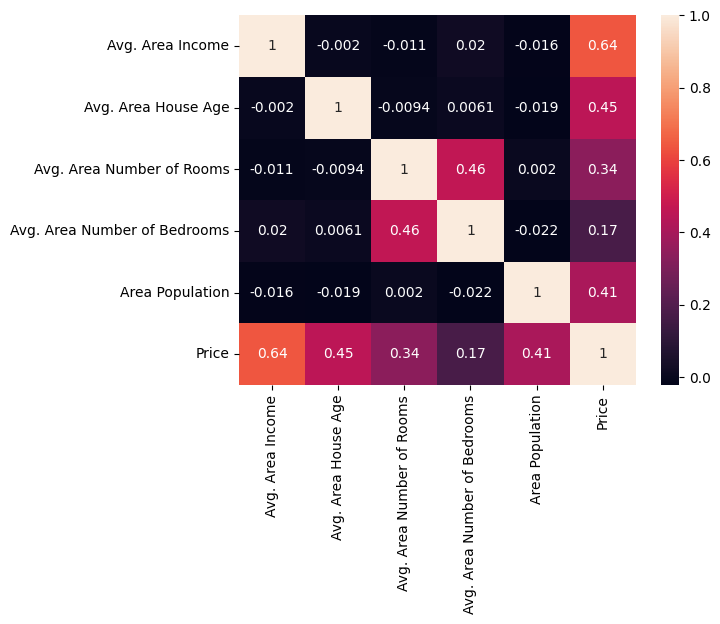

In [88]:
sns.heatmap(df.corr(method='pearson'), annot=True)

> 4. `Normality` : การแจกแจงของตัวแปรตามเป็นแบบโค้งปกติ (Normal Distribution) ที่ทุกค่าของ X

ตรวจสอบการแจกแจงของราคาบ้านจาก assumption ในข้อ 4

<AxesSubplot:xlabel='Price', ylabel='Count'>

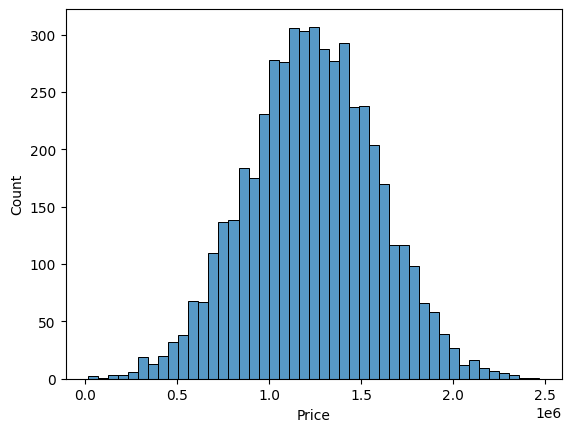

In [89]:
sns.histplot(df['Price'])

## 📈 Training a Linear Regression Model

ในการฝึกโมเดลจะมีอยู่ 2 วิธี
1. ฝึกด้วย *`Closed-form Equation`*
2. ฝึกด้วย *`Gradient Descent`*

แต่ก่อนจะเริ่มฝึกโมเดล เราจำเป็นที่จะต้องเข้าใจตรงกันก่อน  
โดยกำหนดเครื่องหมายให้
* $A$ ตัวพิมพ์ใหญ่คือ matrix
* $\boldsymbol{a}$ ตัวหนาพิมพ์เล็กคือ vector
* $a$ ตัวพิมพ์เล็กคือ scalar

สมการที่ใช้การทำนายของ Linear Regression คือ  
$$\hat{y} = θ_0x_0 + θ_1x_1 + θ_2x_2 + \ldots + θ_nx_n$$  
โดยที่  
$\hat{y}$: ค่าที่โมเดลทำนายออกมา  
$\theta$: model parameters  
$x$: feature value  
$n$: จำนวน feature ในชุดข้อมูล  
$x_0$: 1 (สำหรับการคูณ vector)  
$\theta_0$: Intercept

สังเกตว่าสมการนี้คือ dot product ระหว่าง θ กับ x จึงสามารถเขียนสมการใหม่ได้ออกมาเป็น
$$\hat{y} = \boldsymbol{x}^T \boldsymbol{\theta}$$

แต่ในการคำนวณจริง เราจำเป็นต้องคำนวณค่า $\hat{y}$ หลายตัวพร้อมกัน  
จึงให้ X เป็น matrix ที่มี $n$ แถวแทนจำนวนชุดข้อมูล และ $i$ คอลัมน์แทนจำนวน feature
$$
\begin{bmatrix}  
x_0^0  & \cdots & x_i^0  \\
\vdots & \ddots & \vdots \\
x_0^n  & \cdots & x_i^n  \\
\end{bmatrix}  
\begin{bmatrix}  
\theta_0 \\
\vdots   \\
\theta_i \\
\end{bmatrix} = 
\begin{bmatrix}  
\hat{y}_0 \\
\vdots  \\
\hat{y}_n \\
\end{bmatrix}  
$$
$$\boldsymbol{\hat{y}} = X\boldsymbol{\theta}$$

### 👇 กำหนดตัวแปรอิสระ X และตัวแปรตาม y

In [90]:
X = df.iloc[:, :5].to_numpy()  # Everything except 'Price' and 'Address'
y = df[['Price']].to_numpy()

### 🧱 Train Test Split

ใช้ฟังก์ชัน train_test_split จาก sklearn.model_selection  
ทำการแบ่งข้อมูลออกเป็น 2 ชุด
* ส่วนหนึ่งเอาไว้สำหรับการฝึกโมเดล
* อีกส่วนหนึ่งเอาไว้สำหรับการทดสอบ

กำหนดให้ข้อมูลฝึกเป็น 80% ของข้อมูลทั้งหมด

In [91]:
from sklearn.model_selection import train_test_split

seed = 42
test_percent = 0.2
split: list[np.ndarray] = train_test_split(X, y, test_size=test_percent, random_state=seed)
X_train, X_test, y_train, y_test = split

## ⚪ Closed-form Equation

เป็นการคำนวณหาค่า model parameters โดยตรง

โดยเราจะกำหนด cost function แล้วหา model parameter ที่ทำให้ cost function มีค่าน้อยที่สุดที่เป็นไปได้  
cost function ที่จะใช้คือ Mean Squared Error (MSE)
$$MSE(\hat{y}, y) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i-y_i)^2$$
โดยที่  
$\hat{y}$: ข้อมูลที่โมเดลทำนายออกมา  
$y$: ข้อมูลที่แท้จริง  
$n$: จำนวนข้อมูล  

ซึ่งสามารถจัดรูปใหม่ได้เป็น
$$MSE(\boldsymbol{\hat{y}}, \boldsymbol{y}) = \frac{1}{n} (\boldsymbol{\hat{y}} - \boldsymbol{y})^T(\boldsymbol{\hat{y}} - \boldsymbol{y})$$

แล้วนำ $\boldsymbol{\hat{y}} = X\boldsymbol{\theta}$ มาแทนในสมการ จะได้
$$MSE(X, \boldsymbol{\theta}, \boldsymbol{y}) = \frac{1}{n} (X\boldsymbol{\theta} - \boldsymbol{y})^T(X\boldsymbol{\theta} - \boldsymbol{y})$$

ใน Python จะเขียนฟังก์ชัน MSE ได้แบบนี้

In [92]:
def mse(y: np.ndarray, y_hat: np.ndarray):
    '''
    ### Mean Square Error

    ### Parameters
    y : ndarray
        the actual value of y.
    y_hat : ndarray
        the predicted value of y. 
    '''
    return ((y - y_hat).T.dot(y - y_hat) / len(y))[0, 0]

$$\begin{matrix} \text{Vector derivative} \\ \text{(B is a constant matrix)} \end{matrix}$$
$$
\begin{array}{c c c}
\hline
\\ f(x) & \rightarrow & \frac{df}{dx} \\ \\
\hline \\
\boldsymbol{x}^TB & \rightarrow & B \\ 
\boldsymbol{x}^T\boldsymbol{b} & \rightarrow & \boldsymbol{b} \\ 
\boldsymbol{x}^T\boldsymbol{x} & \rightarrow & 2\boldsymbol{x} \\
\boldsymbol{x}^TB\boldsymbol{x} & \rightarrow & 2B\boldsymbol{x} \\
\end{array}
$$
ตารางสรุป [vector derivative](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) สำหรับการหา derivative ของ MSE

เราต้องการหา $\boldsymbol{\theta}$ ที่ทำให้ MSE มีค่าออกมาน้อยที่สุดเท่าที่เป็นไปได้ จึงต้องทำการหา partial derivative ของ MSE เทียบกับ $\boldsymbol{\theta}$

$$  
\def\MSE{MSE(\boldsymbol{\theta})}
\def\parMSE{\frac{\partial{\MSE}}{\partial{\boldsymbol{\theta}}}}
\begin{aligned}
\parMSE &= \frac{\partial}{\partial{\boldsymbol{\theta}}}
\left[\frac{1}{n} (X\boldsymbol{\theta} - \boldsymbol{y})^T(X\boldsymbol{\theta} - \boldsymbol{y})\right] \\

&= \frac{\partial}{\partial{\boldsymbol{\theta}}}
\left[\frac{1}{n} (\boldsymbol{\theta}^TX^T - \boldsymbol{y}^T)(X\boldsymbol{\theta} - \boldsymbol{y})\right] \\

&= \frac{\partial}{\partial{\boldsymbol{\theta}}}
\left[\frac{1}{n} (\boldsymbol{\theta}^TX^TX\boldsymbol{\theta} - \boldsymbol{\theta}^TX^Ty - y^TX\boldsymbol{\theta} + y^Ty)\right] \\

&= \frac{\partial}{\partial{\boldsymbol{\theta}}}
\left[\frac{1}{n} (\boldsymbol{\theta}^TX^TX\boldsymbol{\theta} - \boldsymbol{\theta}^TX^Ty - (y^TX\boldsymbol{\theta})^T + y^Ty)\right] \\

&= \frac{\partial}{\partial{\boldsymbol{\theta}}}
\left[\frac{1}{n} (\boldsymbol{\theta}^TX^TX\boldsymbol{\theta} - \boldsymbol{\theta}^TX^Ty - \boldsymbol{\theta}^TX^Ty + y^Ty)\right] \\

&= \frac{\partial}{\partial{\boldsymbol{\theta}}}
\left[\frac{1}{n} (\boldsymbol{\theta}^TX^TX\boldsymbol{\theta} - 2\boldsymbol{\theta}^TX^Ty + y^Ty)\right] \\

&= \frac{1}{n} \left(2X^TX\boldsymbol{\theta} - 2X^Ty \right) \\

&= \frac{2}{n} \left(X^TX\boldsymbol{\theta} - X^Ty \right) \\
\end{aligned}
$$

จากนั้นหาค่าวิกฤตของ $\theta$ ที่ทำให้ $\parMSE$ เท่ากับ 0
$$
\begin{aligned}
\parMSE &= 0 \\
\frac{2}{n} \left(X^TX\boldsymbol{\theta} - X^Ty \right) &= 0 \\
X^TX\boldsymbol{\theta} - X^Ty &= 0 \\
X^TX\boldsymbol{\theta} &= X^Ty \\
\boldsymbol{\theta} &= (X^TX)^{-1}X^Ty \\
\end{aligned}
$$
สุดท้ายก็จะได้ออกมาเป็น [normal equation](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression)

##### หลังจากนั้นเราจะสร้าง class สำหรับ linear regression โดยใช้ normal equation

In [93]:
class ClosedFormRegression:
    def __init__(self):
        self.weights = None  # model parameters θ

    def fit(self, x: np.ndarray, y: np.ndarray):
        bias = np.ones((x.shape[0], 1))  # สร้าง x0
        x = np.concatenate((bias, x), axis=1)  # เพิ่ม x0 ใน column แรก
        self.weights = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)  # normal equation
        return self

    def predict(self, x: np.ndarray) -> np.ndarray:
        bias = np.ones((x.shape[0], 1))  # สร้าง x0
        x = np.concatenate((bias, x), axis=1)  # เพิ่ม x0 ใน column แรก
        return np.dot(x, self.weights)  # คำนวณ y_hat

    def score(self, x: np.ndarray, y: np.ndarray) -> np.float64:
        '''Calculate coefficient of determination (R^2)'''
        ss_mean = np.sum((y - y.mean()) ** 2)
        ss_fit = np.sum((y - self.predict(x)) ** 2)
        return (ss_mean - ss_fit) / ss_mean

สำหรับ method score คือ method ที่คำนวณ coefficient of determination ($R^2$)  
coefficient of determination เป็นเลขที่อยู่ในช่วง 0 ถึง 1 บ่งบอกว่าโมเดลทำนายได้ดีแค่ไหน หาได้จากอัตราส่วนของ 
ความแปรปรวน (variance) ของ y จากค่าที่ทำนาย ($\hat{y}$) กับความแปรปรวนของ y จากค่าเฉลี่ย แล้วนำค่าที่ได้ไปลบ 1
$$
R^2 = 1 - \frac{(\boldsymbol{y} - \boldsymbol{\hat{y}})^T(\boldsymbol{y} - \boldsymbol{\hat{y}})}{(\boldsymbol{y} - \boldsymbol{\bar{y}})^T(\boldsymbol{y} - \boldsymbol{\bar{y}})}
$$

In [94]:
model = ClosedFormRegression()
model.fit(X_train, y_train)
print("Train score:", model.score(X_train, y_train))
print(" Test score:", model.score(X_test, y_test))

Train score: 0.9179787435623722
 Test score: 0.9179971706834336


ตัวเลขข้างต้นหมายถึง เปอร์เซ็นต์การกระจายของ y ที่สามารถอธิบายได้ด้วยตัวแปรอิสระ (x)

##### ทำนายราคาบ้านในข้อมูลทดสอบ

In [95]:
y_test_pred = model.predict(X_test)  # y test prediction

สร้างตาราง input, output และ predicted output

In [96]:
test_result = pd.DataFrame(X_test, columns=df.columns[:5])
test_result['Price'] = y_test
test_result['Predict'] = y_test_pred
test_result['Error'] = y_test_pred - y_test
test_result

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Predict,Error
0,61907.593345,7.017838,6.440256,3.25,43828.947207,1.339096e+06,1.308588e+06,-30508.150248
1,57160.202243,6.893260,6.921532,3.13,43467.147035,1.251794e+06,1.237037e+06,-14756.949343
2,70190.796445,6.745054,6.662567,2.01,29215.136112,1.340095e+06,1.243429e+06,-96665.625899
3,69316.796889,6.300409,7.873576,4.28,24448.211461,1.431508e+06,1.228900e+06,-202607.409824
4,72991.481649,3.412866,6.494081,2.48,50626.495426,1.042374e+06,1.063321e+06,20947.383012
...,...,...,...,...,...,...,...,...
995,77267.656264,3.939501,8.342808,6.09,22487.712072,1.107031e+06,1.042903e+06,-64128.670938
996,75967.135085,5.939370,6.111658,2.32,38897.091584,1.405505e+06,1.318532e+06,-86973.442132
997,81013.615294,7.149797,7.239105,5.44,45472.049451,1.924156e+06,1.870001e+06,-54154.099527
998,86762.882864,6.530193,5.106962,2.09,47724.581355,1.571254e+06,1.663624e+06,92370.326701


##### ตรวจสอบน้ำหนัก (θ)

In [97]:
np.set_printoptions(suppress=True)  # suppress scientific notation
w_names = ["Intercept"] + list(df.columns)
for i, line in enumerate(str(model.weights).splitlines()):
    print(f"{line:21} -> θ[{i}] ({w_names[i]})")
np.set_printoptions(suppress=False)

[[-2635072.90093305]  -> θ[0] (Intercept)
 [      21.65220576]  -> θ[1] (Avg. Area Income)
 [  164666.48072189]  -> θ[2] (Avg. Area House Age)
 [  119624.01223206]  -> θ[3] (Avg. Area Number of Rooms)
 [    2440.37761102]  -> θ[4] (Avg. Area Number of Bedrooms)
 [      15.27031343]] -> θ[5] (Area Population)


ค่าน้ำหนักแต่ละค่าสามารถสื่อถึงความสำคัญของแต่ละ feature ได้ 
แต่เพราะว่าช่วงตัวเลขของแต่ละ feature มีค่าไม่เท่ากัน อาจทำให้เข้าใจผิดว่าบาง feature ไม่สำคัญหรือสำคัญเกินไป


ดังนั้นเพื่อแก้ปัญหานี้จึงนำไปสู่หัวข้อถัดไป

## 📏 Standardization

[Standardization](https://en.wikipedia.org/wiki/Standard_score) หรือ Z-score normalization คือการนำข้อมูล Feature / Column มาปรับให้ Mean ($\bar x$) = 0 และ Standard Deviation ($\sigma$) = 1 (Unit Variance)  
ทำให้ข้อมูลทั้งหมดอยู่ในช่วงเดียวกัน
$$
x^\prime= \frac{x - \bar{x}}{\sigma}
$$

In [98]:
class StandardScaler:
    def __init__(self):
        self.mean = 0
        self.std = 1

    def fit(self, x: np.ndarray):
        '''Compute the mean and std to be used for later scaling'''
        self.mean = np.mean(x, axis=0)  # mean of each column
        self.std = np.std(x, axis=0)  # std of each column
        return self

    def transform(self, x: np.ndarray) -> np.ndarray:
        '''Perform standardization'''
        return (x - self.mean) / self.std

##### standardization dataset

In [99]:
scaler = StandardScaler()
scaler.fit(X)
tX = scaler.transform(X)  # transformed X

split: list[np.ndarray] = train_test_split(tX, test_size=test_percent, random_state=seed)
X_train_scaled, X_test_scaled = split

ฝึกโมเดลอึกครั้งด้วยข้อมูลที่ทำ standardization แล้ว

In [100]:
std_model = ClosedFormRegression()
std_model.fit(X_train_scaled, y_train)
print("Train score:", std_model.score(X_train_scaled, y_train))
print(" Test score:", std_model.score(X_test_scaled, y_test))

Train score: 0.9179787435623722
 Test score: 0.9179971706834332


##### ทำนายราคาบ้านด้วย X ที่ standardization แล้ว

In [101]:
y_test_scaled_pred = std_model.predict(X_test_scaled)

เปรียบเทียบราคาที่ทำนายจากทั้งสองข้อมูล

In [102]:
pd.DataFrame({"Not scaled": y_test_pred.ravel(), "Scaled": y_test_scaled_pred.ravel()})

,Not scaled,Scaled
0,1.308588e+06,1.308588e+06
1,1.237037e+06,1.237037e+06
2,1.243429e+06,1.243429e+06
3,1.228900e+06,1.228900e+06
4,1.063321e+06,1.063321e+06
...,...,...
995,1.042903e+06,1.042903e+06
996,1.318532e+06,1.318532e+06
997,1.870001e+06,1.870001e+06
998,1.663624e+06,1.663624e+06


##### ตรวจสอบน้ำหนักอีกครั้ง

In [103]:
np.set_printoptions(suppress=True)  # suppress scientific notation
w_names = ["Intercept"] + list(df.columns)
for i, line in enumerate(str(std_model.weights).splitlines()):
    print(f"{line:21} -> θ[{i}] ({w_names[i]})")
np.set_printoptions(suppress=False)

[[1232002.67482016]   -> θ[0] (Intercept)
 [ 230745.9407329 ]   -> θ[1] (Avg. Area Income)
 [ 163243.2731459 ]   -> θ[2] (Avg. Area House Age)
 [ 120309.77397939]   -> θ[3] (Avg. Area Number of Rooms)
 [   3011.45976047]   -> θ[4] (Avg. Area Number of Bedrooms)
 [ 151552.63069253]]  -> θ[5] (Area Population)


จากน้ำหนักข้างต้น ทำให้สรุปได้ว่า  
* Avg. Area Income เป็นปัจจัยหลักที่ส่งผลต่อราคาบ้านมากที่สุด  
* Avg. Area Number of Bedrooms เป็นปัจจัยที่ส่งผลต่อราคาบ้านน้อยที่สุด

## 📉 Gradient Descent

อีกรูปแบบหนึ่งของการฝึกโมเดลโดยการมอง linear regression ในรูปแบบของ neural network โดยแทนที่จะหาคำตอบโดยตรง จะเปลี่ยนเป็นการทำให้ค่า cost ค่อยๆน้อยลงเรื่อยๆ  
โดยโครงสร้างของ neural network จะเป็นแบบนี้  

<img src="https://github.com/sanfong/HouseLinReg/blob/main/NeuralModel.jpg?raw=true" width="800"/>

โดย Gradient Descent ต้องการหาว่าเปลี่ยนน้ำหนักในทิศทางไหนที่ทำให้ cost ลดลงได้มากที่สุด ดังนั้นเราจึงต้องหา $\parMSE$ ที่ได้มาก่อนหน้านี้
$$
\begin{aligned}
\parMSE &= \frac{2}{n} \left(X^TX\boldsymbol{\theta} - X^Ty \right) \\
&= \frac{2}{n} ~ X^T\left(X\boldsymbol{\theta} - y \right) \\
\end{aligned}
$$
ถ้าหากความชันจาก $\parMSE$ มีค่าเป็นบวก เราจะต้องลดค่าน้ำหนักลง  

![theta-decrease](https://media.geeksforgeeks.org/wp-content/uploads/theta-decrease.jpg)

แต่ถ้าความชันมีค่าเป็นลบ เราจะต้องเพิ่มค่าน้ำหนักขึ้น

![theta-increase](https://media.geeksforgeeks.org/wp-content/uploads/theta-increase.jpg)

หลังจากที่เรารู้ทิศทาง เราจำเป็นที่จะต้องรู้ระยะทางด้วยว่าควรเปลี่ยนค่าน้ำหนักมากน้อยแค่ไหน จึงต้องมีการกำหนด learning rate ($\alpha$)  
การกำหนด learning rate มีความสำคัญตรงที่หากกำหนด learning rate มากเกินไปอาจทำให้ผลลัพธ์แย่กว่าเดิม แต่ถ้าน้อยเกินไปจะทำให้ใช้เวลาฝึกนาน

![learning rate](https://www.educative.io/cdn-cgi/image/f=auto,fit=contain,w=600/api/edpresso/shot/5555558418481152/image/6288908431130624.png)

สรุปแล้วสมการการเปลื่ยนค่าน้ำหนักคือ
$$
\boldsymbol{\theta} = \boldsymbol{\theta} - \alpha \parMSE
$$

##### สร้าง class สำหรับ linear regression ด้วยวิธี gradient descent

In [104]:
class GradientRegression:
    def __init__(self):
        self.weights = None

    def train(self, x: np.ndarray, y: np.ndarray, *, learning_rate=0.01, epoch=10000, get_progess=False, points=100):
        bias = np.ones((x.shape[0], 1))
        x = np.concatenate((bias, x), axis=1)
        if self.weights is None:
            self.weights = np.ones((x.shape[1], 1))  # ให้น้ำหนักเริ่มต้นเท่ากับ 1
            self.weights[0, 0] = 0  # intercept = 0

        if get_progess:
            times = [0]
            errors = [mse(y, x.dot(self.weights))]

        for i in range(1, epoch+1):
            slope = x.T.dot(x.dot(self.weights) - y) / y.shape[0]
            self.weights = self.weights - learning_rate * slope

            if get_progess and i % (epoch // points) == 0:
                times.append(i)
                errors.append(mse(y, x.dot(self.weights)))

        if get_progess:
            return times, errors
            
        return self

    def predict(self, x: np.ndarray) -> np.ndarray:
        bias = np.ones((x.shape[0], 1))  # สร้าง x0
        x = np.concatenate((bias, x), axis=1)  # เพิ่ม x0 ใน column แรก
        return np.dot(x, self.weights)  # คำนวณ y_hat

    def score(self, x: np.ndarray, y: np.ndarray) -> np.float64:
        '''Calculate coefficient of determination (R^2)'''
        ss_mean = np.sum((y - y.mean()) ** 2)
        ss_fit = np.sum((y - self.predict(x)) ** 2)
        return (ss_mean - ss_fit) / ss_mean

##### การฝึกด้วย gradient descent ข้อมูลที่จะใช้ฝึกต้องผ่าน standardization มาแล้ว

In [105]:
gr = GradientRegression()
grXplot, grYplot = gr.train(X_train_scaled, y_train, get_progess=True, epoch=500, learning_rate=0.04)
print(f"MSE after train: {grYplot[-1]:,}")
print("Test score:", gr.score(X_test_scaled, y_test))

MSE after train: 10,256,318,870.47051
Test score: 0.9179970241994562


น้ำหนักที่ได้

In [106]:
np.set_printoptions(suppress=True)
w_names = ["Intercept"] + list(df.columns)
for i, line in enumerate(str(gr.weights).splitlines()):
    print(f"{line:21} -> θ[{i}] ({w_names[i]})")
np.set_printoptions(suppress=False)

[[1232002.64304797]   -> θ[0] (Intercept)
 [ 230745.82992206]   -> θ[1] (Avg. Area Income)
 [ 163243.20484492]   -> θ[2] (Avg. Area House Age)
 [ 120308.119379  ]   -> θ[3] (Avg. Area Number of Rooms)
 [   3013.15164837]   -> θ[4] (Avg. Area Number of Bedrooms)
 [ 151552.66929325]]  -> θ[5] (Area Population)


##### หากฝึกด้วยข้อมูลที่ยังไม่ standardization

In [107]:
gr2 = GradientRegression()
gr2Xplot, gr2Yplot = gr2.train(X_train, y_train, get_progess=True, learning_rate=3e-10, epoch=500)
print(f"MSE after train: {gr2Yplot[-1]:,}")
print("Test score:", gr2.score(X_test, y_test))

MSE after train: 62,335,233,384.208885
Test score: 0.48944408876855433


น้ำหนักที่ได้

In [108]:
np.set_printoptions(suppress=True)
w_names = ["Intercept"] + list(df.columns)
for i, line in enumerate(str(gr2.weights).splitlines()):
    print(f"{line:16} -> θ[{i}] ({w_names[i]})")
np.set_printoptions(suppress=False)

[[-0.00190546]   -> θ[0] (Intercept)
 [13.04623599]   -> θ[1] (Avg. Area Income)
 [ 1.01257321]   -> θ[2] (Avg. Area House Age)
 [ 1.00467537]   -> θ[3] (Avg. Area Number of Rooms)
 [ 1.00364568]   -> θ[4] (Avg. Area Number of Bedrooms)
 [ 9.65965603]]  -> θ[5] (Area Population)


##### เปรียบเทียบผลการฝึกจากข้อมูลทั้งสองแบบ

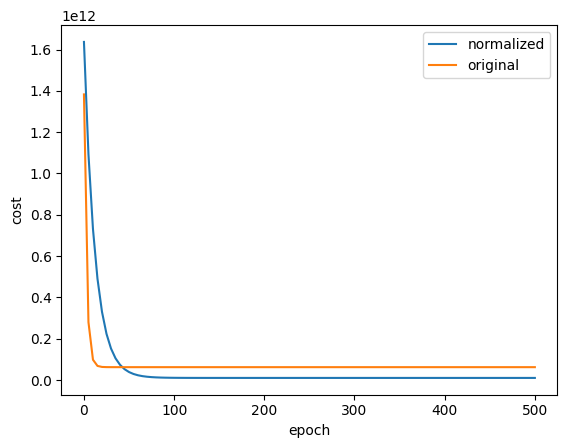

In [109]:
plt.plot(grXplot, grYplot, label="normalized")
plt.plot(gr2Xplot, gr2Yplot, label="original")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.legend()
plt.show()